# TITANIC DATASET

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

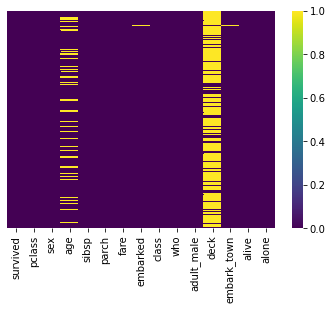

In [7]:
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False)

In [8]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [9]:
df['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [10]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [11]:
sns.set_style('dark')

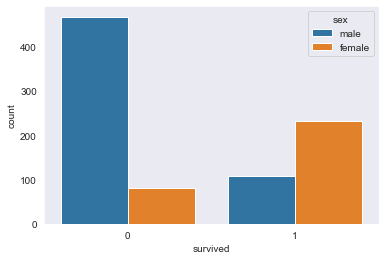

In [12]:
sns.countplot('survived',hue='sex',data=df)

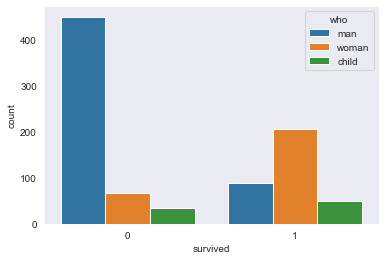

In [13]:
sns.countplot('survived',hue='who',data=df)

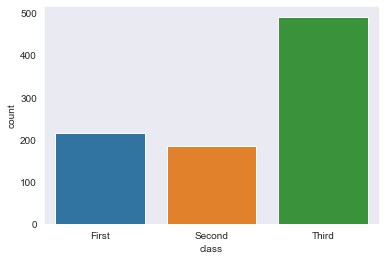

In [14]:
sns.countplot('class',data=df)

In [15]:
df['fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

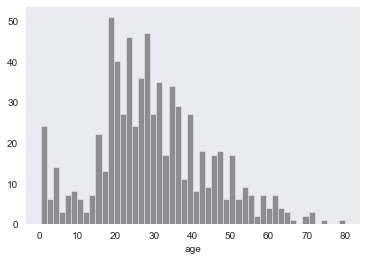

In [16]:
sns.distplot(df['age'].dropna(),kde=False,bins=50,color='k')

### CLEAN THE DATA

In [17]:
#df.drop(columns=['sibsp','fare','embarked','embark_town','alive','alone','deck','age','pclass'],inplace=True)#
#df
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [18]:
df.drop(columns=['age', 'who', 'deck', 'embark_town', 'alive'], inplace=True)

In [19]:
df
df=pd.get_dummies(df, drop_first=True)
df['alone']=df['alone'].map({True:1, False:0})
df['adult_male']=df['adult_male'].map({True:1, False:0})
df

,survived,pclass,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,1,0,7.2500,1,0,1,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0,0,0,0
2,1,3,0,0,7.9250,0,1,0,0,1,0,1
3,1,1,1,0,53.1000,0,0,0,0,1,0,0
4,0,3,0,0,8.0500,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1,1,1,0,1,1,0
887,1,1,0,0,30.0000,0,1,0,0,1,0,0
888,0,3,1,2,23.4500,0,0,0,0,1,0,1
889,1,1,0,0,30.0000,1,1,1,0,0,0,0


In [20]:
df=pd.get_dummies(df, drop_first=True)
df

,survived,pclass,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,1,0,7.2500,1,0,1,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0,0,0,0
2,1,3,0,0,7.9250,0,1,0,0,1,0,1
3,1,1,1,0,53.1000,0,0,0,0,1,0,0
4,0,3,0,0,8.0500,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1,1,1,0,1,1,0
887,1,1,0,0,30.0000,0,1,0,0,1,0,0
888,0,3,1,2,23.4500,0,0,0,0,1,0,1
889,1,1,0,0,30.0000,1,1,1,0,0,0,0


In [21]:
df['alone']=df['alone'].map({True:1, False:0})
df['adult_male']=df['adult_male'].map({True:1, False:0})
df

,survived,pclass,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,1,0,7.2500,1,0,1,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0,0,0,0
2,1,3,0,0,7.9250,0,1,0,0,1,0,1
3,1,1,1,0,53.1000,0,0,0,0,1,0,0
4,0,3,0,0,8.0500,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1,1,1,0,1,1,0
887,1,1,0,0,30.0000,0,1,0,0,1,0,0
888,0,3,1,2,23.4500,0,0,0,0,1,0,1
889,1,1,0,0,30.0000,1,1,1,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [23]:
X = df.drop('survived',axis=1)
y = df['survived']

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [25]:
knn = KNeighborsClassifier(n_neighbors=18)

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [27]:
y_pred = knn.predict(X_test)

In [28]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0], dtype=int64)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[97, 16],
       [26, 40]], dtype=int64)

In [30]:
knn.score(X_test,y_test)

0.7653631284916201

In [31]:
for k in range(1, 50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(knn.score(X_test, y_test))

0.7374301675977654
0.7541899441340782
0.7597765363128491
0.7597765363128491
0.7206703910614525
0.7430167597765364
0.7486033519553073
0.7541899441340782
0.7374301675977654
0.7430167597765364
0.7541899441340782
0.7486033519553073
0.7486033519553073
0.7486033519553073
0.7541899441340782
0.7541899441340782
0.7541899441340782
0.7653631284916201
0.7597765363128491
0.7653631284916201
0.7541899441340782
0.7653631284916201
0.7597765363128491
0.770949720670391
0.776536312849162
0.7653631284916201
0.776536312849162
0.776536312849162
0.7597765363128491
0.7541899441340782
0.776536312849162
0.776536312849162
0.770949720670391
0.7932960893854749
0.7821229050279329
0.7877094972067039
0.7877094972067039
0.7988826815642458
0.8044692737430168
0.7821229050279329
0.7877094972067039
0.7430167597765364
0.7597765363128491
0.7430167597765364
0.7486033519553073
0.7430167597765364
0.7486033519553073
0.7430167597765364
0.7374301675977654


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
tree = DecisionTreeClassifier(random_state=0,max_depth=2)

In [34]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [35]:
y_pred = tree.predict(X_test)

In [36]:
confusion_matrix(y_test, y_pred)

array([[109,   4],
       [ 35,  31]], dtype=int64)

In [37]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       113
           1       0.89      0.47      0.61        66

    accuracy                           0.78       179
   macro avg       0.82      0.72      0.73       179
weighted avg       0.80      0.78      0.76       179



In [39]:
tree.score(X_test,y_test)

0.7821229050279329

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
regr = RandomForestClassifier(max_depth=2, random_state=0)

In [50]:
regr.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [51]:
regr.predict(X_test)

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       113
           1       0.70      0.59      0.64        66

    accuracy                           0.75       179
   macro avg       0.74      0.72      0.73       179
weighted avg       0.75      0.75      0.75       179



In [53]:
print(confusion_matrix(y_test,y_pred))

[[96 17]
 [27 39]]


In [54]:
print(regr.score(X_test,y_test))

0.7932960893854749


In [45]:
knn = KNeighborsClassifier(n_neighbors=15)

In [46]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [47]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

In [ ]:
knn.score(X_test,y_test)

## LINEAR REGRESSION

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
reg = LinearRegression()

In [73]:
reg.fit(X_train,y_train)

LinearRegression()

In [74]:
reg.predict(X_test)

array([ 1.0549793 ,  0.07639173,  0.74411959,  0.66704461,  0.07962337,
        0.66698702,  1.00210293,  0.66511245,  0.07639173,  0.07739465,
        0.74937495, -0.06604127,  0.10820999,  0.96017958,  0.98753894,
        0.80964928,  0.99806594,  0.07603513,  0.07674832,  0.10633541,
        0.10890728,  0.65176459,  0.65456164,  0.05112243,  0.34454111,
        0.66511432,  0.6551411 ,  0.63543808,  0.27322931,  0.2519866 ,
        0.07685976,  0.96348923,  0.10820999,  0.63546964,  0.07639173,
        0.94672399,  0.98844833,  0.81655831,  0.38212968,  0.07666105,
        0.36828106,  0.9472756 ,  0.56839656,  0.82366186,  0.07663502,
        0.26899175,  0.10852571,  0.2519866 ,  0.07669261,  0.25220947,
        0.09183977,  0.25087224,  0.24862073,  0.49273577,  0.40367893,
        0.04280763,  0.19547002,  0.41463927,  0.25087224,  0.07669261,
        0.81076364,  0.07652545,  0.07633601,  0.07674832,  0.94678528,
        0.07669261,  0.49966812,  0.63539164,  0.07667959,  0.73

## EXTRA TREE CLASSIFIER

In [76]:
from sklearn.tree import ExtraTreeClassifier as  reg2

In [77]:
tree = reg2()

In [78]:
tree.fit(X_train,y_train)

ExtraTreeClassifier()

In [79]:
y_pred = tree.predict(X_test)

In [80]:
tree.score(X_test,y_test)

0.7821229050279329

In [81]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0], dtype=int64)

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dec_tree = DecisionTreeClassifier(max_depth=2,random_state=1)

In [92]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [93]:
y_pred = dec_tree.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [94]:
print(dec_tree.score(X_test,y_test))

0.7821229050279329


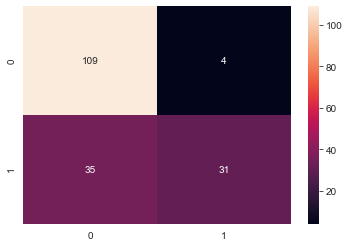

In [99]:
sns.heatmap(confusion_matrix(y_test,y_pred),fmt="d",annot=True)